# Entrenamiento con datos de entrenamiento
<hr>

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [3]:
X = pd.read_csv("../Reducción descriptores/BBB_h.csv")

In [4]:
X.shape

(7807, 58)

In [5]:
X.fillna(method='ffill', inplace=True)


C:\Users\Eliud\AppData\Local\Temp\ipykernel_2608\419284443.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [6]:
df = pd.read_csv("../Descriptores calculados/BBB_descriptores.csv")

In [7]:
y = df["BBB+/BBB-"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
pipe = Pipeline([
    ('RF', RandomForestClassifier())
])

In [10]:
param_grid = {
    'RF__max_depth': [10, 20, 30, 40, 50],
    'RF__bootstrap': [True, False],
    'RF__max_features': ['sqrt', "log2"]
}

In [11]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   2.3s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   2.3s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   2.3s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   2.4s


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'RF__bootstrap': False, 'RF__max_depth': 40, 'RF__max_features': 'log2'}

In [ ]:
grid_search.best_score_

0.8810248198558845

# Entrenamiento con los datos de prueba
<hr>

In [ ]:
pipe = Pipeline([
    ('svc', RandomForestClassifier(bootstrap=False, max_depth=40, max_features="log2"))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('svc',
                 RandomForestClassifier(bootstrap=False, max_depth=40,
                                        max_features='log2'))])

# Resultados del modelo
<hr>

In [ ]:
y_predicha = pipe.predict(X_test)

In [ ]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.882
Recall 0.882
precision 0.881
f1 0.881


In [ ]:
y_entrenamiento = pipe.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.983
Recall 0.983
precision 1.0
f1 0.983


# Confusion Matrix
<hr>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

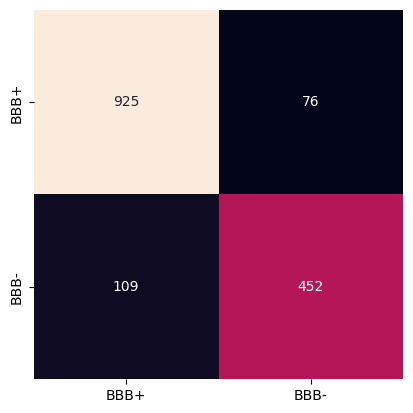

In [ ]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [ ]:
import joblib

In [ ]:
joblib.dump(pipe, '../GuardadoDeModelos MD/modelo_RF.joblib')

['../GuardadoDeModelos MD/modelo_RF.joblib']

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Cargar y preparar los datos
X = pd.read_csv("../Reducción descriptores/BBB_h.csv")
X.fillna(method='ffill', inplace=True)

df = pd.read_csv("../Descriptores calculados/BBB_descriptores.csv")
y = df["BBB+/BBB-"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline
pipe = Pipeline([
    ('RF', RandomForestClassifier())
])

# Definir la rejilla de hiperparámetros
param_grid = {
    'RF__max_depth': [10, 20, 30, 40, 50],
    'RF__bootstrap': [True, False],
    'RF__max_features': ['sqrt', "log2"],
    'RF__n_estimators': [100, 200, 300]
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (validación cruzada):", grid_search.best_score_)

# Usar el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_predicha = best_model.predict(X_test)

# Calcular las métricas en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_predicha)
recall_test = recall_score(y_test, y_predicha, average='weighted')
precision_test = precision_score(y_test, y_predicha, average='weighted')
f1_test = f1_score(y_test, y_predicha, average='weighted')
print("\nResultados en conjunto de prueba:")
print("Accuracy:", round(accuracy_test, 3))
print("Recall:", round(recall_test, 3))
print("Precision:", round(precision_test, 3))
print("F1 Score:", round(f1_test, 3))

# Predecir en el conjunto de entrenamiento
y_entrenamiento = best_model.predict(X_train)

# Calcular las métricas en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_entrenamiento)
recall_train = recall_score(y_train, y_entrenamiento, average='weighted')
precision_train = precision_score(y_train, y_entrenamiento, average='weighted')
f1_train = f1_score(y_train, y_entrenamiento, average='weighted')
print("\nResultados en conjunto de entrenamiento:")
print("Accuracy:", round(accuracy_train, 3))
print("Recall:", round(recall_train, 3))
print("Precision:", round(precision_train, 3))
print("F1 Score:", round(f1_train, 3))


C:\Users\Eliud\AppData\Local\Temp\ipykernel_2608\3356246948.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=100; total time=   2.3s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=100; total time=   2.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=100; total time=   2.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=100; total time=   2.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=100; total time=   2.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=200; total time=   4.6s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=200; total time=   5.0s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, RF__n_estimators=200; total time=   4.9s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF_